# **Project Overview**
#### Project Title - Student Performance Factors
##### Source of data : https://www.kaggle.com/datasets/lainguyn123/student-performance-factors (Year - 2024)

##### Batch name : ANP-C8220

##### Trainer : Mrs. Rajshri Chandrabhan Thate  

#### Name - Shivam pal


### **Columns description**
1. **student_id**: Unique identifier for each student.
2. **Hours_Studied**: Total hours spent studying.
3. **Attendance**: Percentage of school attendance.
4. **Parental_Involvement**: Level of parental involvement (e.g., Low, Medium, High).
5. **Access_to_Resources**: Availability of educational resources for the student (e.g., Low, Medium, High).
6. **Extracurricular_Activities**: Whether the student participates in extracurricular activities (Yes/No).
7. **Sleep_Hours**: Average number of hours the student sleeps per night.
8. **Previous_Scores**: Scores obtained by the student in previous assessments.
9. **Motivation_Level**: Student's self-reported motivation level (e.g., Low, Medium, High).
10. **Internet_Access**: Whether the student has access to the internet (Yes/No).
11. **Tutoring_Sessions**: Number of tutoring sessions attended.
12. **Family_Income**: Family's income level (e.g., Low, Medium, High).
13. **Teacher_Quality**: Perceived quality of the student's teachers (e.g., Low, Medium, High).
14. **School_Type**: The type of school the student attends (Public/Private).
15. **Peer_Influence**: Type of influence from peers (e.g., Positive, Neutral, Negative).
16. **Physical_Activity**: Hours per week spent on physical activities.
17. **Learning_Disabilities**: Whether the student has a learning disability (Yes/No).
18. **Parental_Education_Level**: Highest education level attained by parents (e.g., High School, College, Postgraduate).
19. **Distance_from_Home**: Distance of the school from the student's home (e.g., Near, Moderate, Far).
20. **Gender**: Gender of the student (Male/Female).
21. **Exam_Score**: Student's final exam score.

# **Objective**
Objective of this project is to find useful insights from the tables of MYSQL database. We extract these insights  by analysing and visualizing the data by using python libraries like pandas, matplotlib and seaborn and MYSQL database.<br>
After finding useful insights we can take data driven decisions.

### Technologies Used
[ Pandas, Matplotlib, Seaborn, MYSQL ]

### Import MYSQL connector and necessary libraries
MYSQL connector helps to connect python with mysql database after that we can connect with tables in database.

In [2]:
# python code for conecting to MYSQL database using mysql_connector-python
# import necessary lobraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Stablishing the connection
By using mysql.connector.connect() function we can connect the database with python the required parameters <br>
*`user`*       - username of mysql <br>
*`password`*   - password of mysql<br>
*`host`*       - host name <br>
*`database`*   - name of your database in mysql<br>

In [3]:
# connection stablishing
connection = mysql.connector.connect(
    user = "root",
    password = "I124q.bybi",
    host = "localhost",
    database = "student_performance"
)

### Creating a cursor
A cursor is used to interact with a result set, allowing to fetch rows one at a time. <br>
Cursor is responsible for executing SQL commands and retrieving data.

In [4]:
# # Create a cursor object to execute SQL queries
cursor = connection.cursor()

### Executing SQL Queries:
You can execute SQL queries (like SELECT, INSERT, UPDATE, etc.) using the execute() method of the cursor.
##### *`cursor.fetchall()`*
cursor.fetchall() retrieves all the rows of the query result and returns it as a list of tuples, where each tuple represents a row from the table.
##### *`columns=[desc[0] for desc in cursor.description]`*
This creates the column headers for your DataFrame.
cursor.description provides metadata about the result set. Specifically, desc[0] extracts the column names from this metadata.
Therefore, columns=[desc[0] for desc in cursor.description] dynamically names the DataFrame columns to match the column names from your database table

##### Tables in database

In [5]:
# fetch the total tables used
cursor.execute('SHOW TABLES')
tables = cursor.fetchall()
for table in tables:
    print(table[0])

academic_performance
lifestyle_factors
student_demographics


### Records of *`academic_performance`* table 

In [6]:
# fetch all the data from academic performance table
cursor.execute("SELECT * FROM academic_performance")
# put data into the padas dataframe
academic_df = pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description])
# print the dataframe
academic_df.head()

,student_id,Hours_Studied,Attendance,Previous_Scores,Motivation_Level,Tutoring_Sessions,Exam_Score
0,1,23,84,73,Low,0,67
1,2,19,64,59,Low,2,61
2,3,24,98,91,Medium,2,74
3,4,29,89,98,Medium,1,71
4,5,19,92,65,Medium,3,70


### Records of *`lifestyle_factors`* table 

In [7]:
# executa all the records from the lifestyle_factors
cursor.execute("SELECT * FROM lifestyle_factors")
# fetch all the records and put it into a pandas dataframe
lifestyle_df = pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description])
# print first five row the record
lifestyle_df.head()

,student_id,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Internet_Access,Physical_Activity
0,1,Low,High,No,7,Yes,3
1,2,Low,Medium,No,8,Yes,4
2,3,Medium,Medium,Yes,7,Yes,4
3,4,Low,Medium,Yes,8,Yes,4
4,5,Medium,Medium,Yes,6,Yes,4


### Records of *`student_demographics`* table 

In [8]:
# Execute all the records from the student_demographics table
cursor.execute("SELECT * FROM student_demographics")
# create a pandas dataframe of he records
demo_df = pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description])
# print the output
demo_df.head()

,student_id,Family_Income,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,1,Low,Public,Positive,No,High School,Near,Male
1,2,Medium,Public,Negative,No,College,Moderate,Female
2,3,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,4,Medium,Public,Negative,No,High School,Moderate,Male
4,5,Medium,Public,Neutral,No,College,Near,Female


###  **Data Exploration**

#### *Exploratory Data Analysis (EDA)*

Exploratory Data Analysis (EDA) is a critical step in understanding the structure, quality, and essential characteristics of your dataset before diving into deeper analysis or modeling. Here's how you can approach it:

#### **EDA of *academic_performance* table**

In [9]:
# description of academic_performance table
cursor.execute("DESC academic_performance")
# fetch all record into a object
description = pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description])
# print the description
print(description)

               Field  Type Null  Key Default Extra
0         student_id   int   NO  PRI    None      
1      Hours_Studied   int  YES         None      
2         Attendance   int  YES         None      
3    Previous_Scores   int  YES         None      
4   Motivation_Level  text  YES         None      
5  Tutoring_Sessions   int  YES         None      
6         Exam_Score   int  YES         None      


In [10]:
# perform statistical measurme
academic_df.describe()

,student_id,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,3304.000000,19.975329,79.977448,75.070531,1.493719,67.235659
std,1907.420946,5.990594,11.547475,14.399784,1.230570,3.890456
min,1.000000,1.000000,60.000000,50.000000,0.000000,55.000000
25%,1652.500000,16.000000,70.000000,63.000000,1.000000,65.000000
50%,3304.000000,20.000000,80.000000,75.000000,1.000000,67.000000
75%,4955.500000,24.000000,90.000000,88.000000,2.000000,69.000000
max,6607.000000,44.000000,100.000000,100.000000,8.000000,101.000000


In [11]:
# Number of rows and columns
print(f"(Rows, columns) : {academic_df.shape}")

(Rows, columns) : (6607, 7)


#### **EDA of *lifestyle_factors* table**

In [12]:
# Description of the lifestye_factors table
cursor.execute("DESC lifestyle_factors")
# put all the description into an object
description = pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description])
# print the description
print(description)

                        Field  Type Null  Key Default Extra
0                  student_id   int  YES  MUL    None      
1        Parental_Involvement  text  YES         None      
2         Access_to_Resources  text  YES         None      
3  Extracurricular_Activities  text  YES         None      
4                 Sleep_Hours   int  YES         None      
5             Internet_Access  text  YES         None      
6           Physical_Activity   int  YES         None      


In [13]:
# perform statistical calculation on the table
lifestyle_df.describe()

,student_id,Sleep_Hours,Physical_Activity
count,6607.000000,6607.00000,6607.000000
mean,3304.000000,7.02906,2.967610
std,1907.420946,1.46812,1.031231
min,1.000000,4.00000,0.000000
25%,1652.500000,6.00000,2.000000
50%,3304.000000,7.00000,3.000000
75%,4955.500000,8.00000,4.000000
max,6607.000000,10.00000,6.000000


In [14]:
# Number of rows and columns
print(f"(Rows, Columns) : {lifestyle_df.shape}")

(Rows, Columns) : (6607, 7)


#### **EDA of *student_demographics* table**

In [15]:
cursor.execute("DESC student_demographics")
description = pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description])
print(description)

                      Field  Type Null  Key Default Extra
0                student_id   int  YES  MUL    None      
1             Family_Income  text  YES         None      
2               School_Type  text  YES         None      
3            Peer_Influence  text  YES         None      
4     Learning_Disabilities  text  YES         None      
5  Parental_Education_Level  text  YES         None      
6        Distance_from_Home  text  YES         None      
7                    Gender  text  YES         None      


In [16]:
# Number of rows and columns
print(f"(Rows, Colunms): {demo_df.shape}")

(Rows, Colunms): (6607, 8)


### **Finding missing and duplicate values**

#### duplicate values from academic_performance table

In [17]:
# finding duplicate values 
duplicates = academic_df.duplicated().sum()
print(f"Number of duplicates = {duplicates}")

Number of duplicates = 0


#### missing values from academic_performance table

In [18]:
# finding missing values
print(academic_df.isnull().sum())

student_id           0
Hours_Studied        0
Attendance           0
Previous_Scores      0
Motivation_Level     0
Tutoring_Sessions    0
Exam_Score           0
dtype: int64


##### So our academic_performance table is totally cleaned and does not contain any duplicates

#### duplicate values from lifestyle_factors table

In [19]:
# finding duplicate values 
duplicates = lifestyle_df.duplicated().sum()
print(f"Number of duplicates = {duplicates}")

Number of duplicates = 0


#### missing values from lifestle_factors table

In [20]:
# finding missing values
print(lifestyle_df.isnull().sum())

student_id                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Internet_Access               0
Physical_Activity             0
dtype: int64


##### So our lifestyle_factors table is totally cleaned and does not contain any duplicates

#### duplicate values from student_demographics table

In [21]:
# finding duplicate values 
duplicates = demo_df.duplicated().sum()
print(f"Number of duplicates = {duplicates}")

Number of duplicates = 0


#### missing values from student_demographics table

In [22]:
# finding missing values
print(demo_df.isnull().sum())

student_id                  0
Family_Income               0
School_Type                 0
Peer_Influence              0
Learning_Disabilities       0
Parental_Education_Level    0
Distance_from_Home          0
Gender                      0
dtype: int64


##### So our student_demographics table is totally cleaned and does not contain any duplicates

#### academic_performance data order by Exam_score Highest to Lowest

In [23]:
query = "SELECT * FROM academic_performance ORDER BY Exam_Score DESC LIMIT 10"
cursor.execute(query)
data = pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description])
data.head(20)

,student_id,Hours_Studied,Attendance,Previous_Scores,Motivation_Level,Tutoring_Sessions,Exam_Score
0,1526,27,98,93,Low,5,101
1,95,18,89,73,Medium,3,100
2,3580,14,90,86,Medium,4,99
3,2426,23,83,89,Low,1,99
4,4193,28,90,91,Medium,0,98
5,6394,16,83,92,Low,2,98
6,6348,28,96,98,High,1,98
7,5967,25,99,77,Medium,0,97
8,530,15,83,97,Medium,2,97
9,920,21,74,94,Medium,1,97


In [24]:
query = "SELECT Motivation_Level, COUNT(student_id) AS Count_Students, AVG(Exam_Score) AS Avg_Exam_Score FROM academic_performance GROUP BY Motivation_Level ORDER BY Avg_Exam_Score DESC"
cursor.execute(query)
group = pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description])
group.head()

,Motivation_Level,Count_Students,Avg_Exam_Score
0,High,1319,67.7043
1,Medium,3351,67.3306
2,Low,1937,66.7522


In [25]:
query = "SELECT student_id, Previous_Scores AS Factor FROM academic_performance UNION SELECT student_id, Parental_Involvement AS Factor FROM lifestyle_factors"
cursor.execute(query)
union = pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description])
union.head(10)

,student_id,Factor
0,1,73
1,2,59
2,3,91
3,4,98
4,5,65
5,6,89
6,7,68
7,8,50
8,9,80
9,10,71


### Joins 

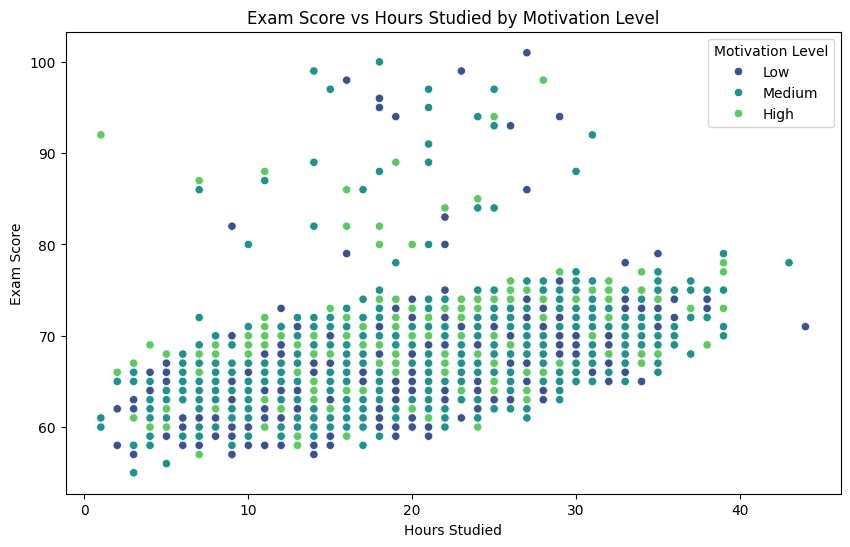

In [26]:
# extract the required columns from the three table using joins
query = "SELECT a.student_id, a.Exam_Score, a.Hours_Studied, a.Attendance, a.Motivation_Level, l.Parental_Involvement, l.Sleep_Hours, l.Extracurricular_Activities,  d.Family_Income, d.School_Type, d.Gender FROM academic_performance a JOIN lifestyle_factors l ON a.student_id = l.student_id JOIN student_demographics d ON a.student_id = d.student_id"
cursor.execute(query)
df = pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description])
# Scatter plot of Exam_Score vs Hours_Studied, colored by Motivation_Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Motivation_Level', data=df, palette='viridis')
plt.title('Exam Score vs Hours Studied by Motivation Level')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend(title='Motivation Level')
plt.show()

#### Insight
Impact of Hours Studied and Motivation: The scatter plot shows that students with higher Motivation_Level tend to study more and score higher on exams.

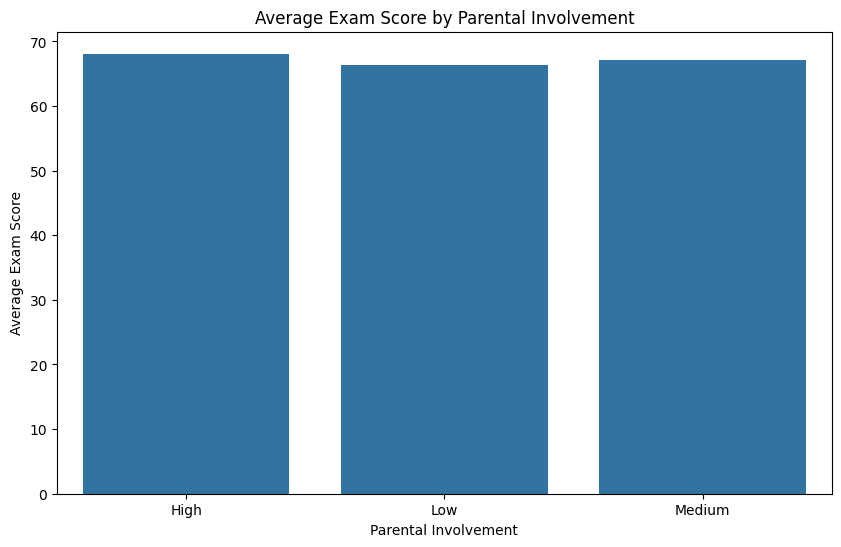

In [27]:
# Group by Parental Involvement and calculate mean Exam Score
parental_involvement_avg = df.groupby('Parental_Involvement')['Exam_Score'].mean().reset_index()

# Bar plot of Average Exam Score by Parental Involvement
plt.figure(figsize=(10, 6))
sns.barplot(x='Parental_Involvement', y='Exam_Score', data=parental_involvement_avg)
plt.title('Average Exam Score by Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Average Exam Score')
plt.show()

#### Insight
Parental Involvement and Performance: The bar plot indicates that students with higher Parental_Involvement perform better in exams on average.

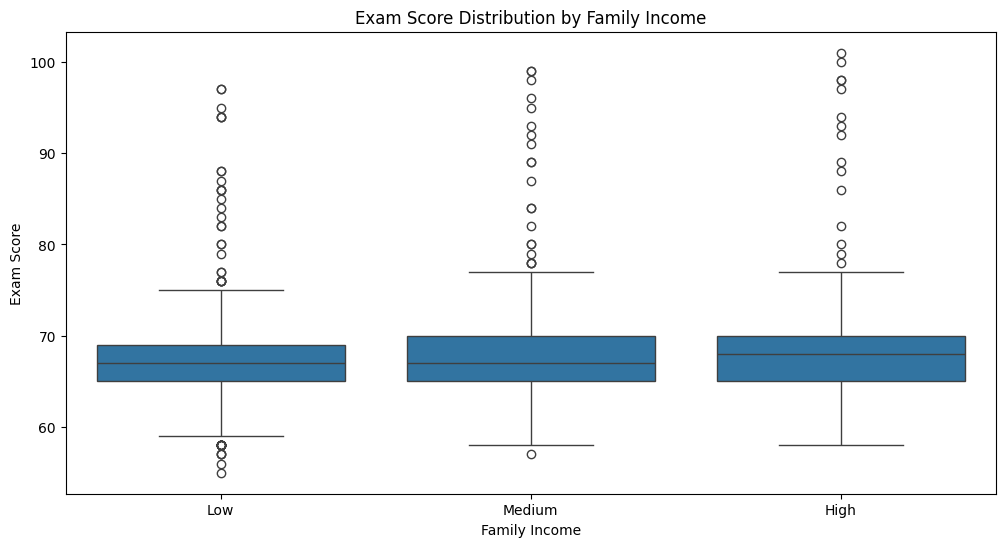

In [28]:
# Box plot of Exam Score distribution by Family Income
plt.figure(figsize=(12, 6))
sns.boxplot(x='Family_Income', y='Exam_Score', data=df)
plt.title('Exam Score Distribution by Family Income')
plt.xlabel('Family Income')
plt.ylabel('Exam Score')
plt.show()


#### Insight
Income and Exam Scores: The box plot could reveal if there’s a clear trend or variance in exam performance based on Family_Income

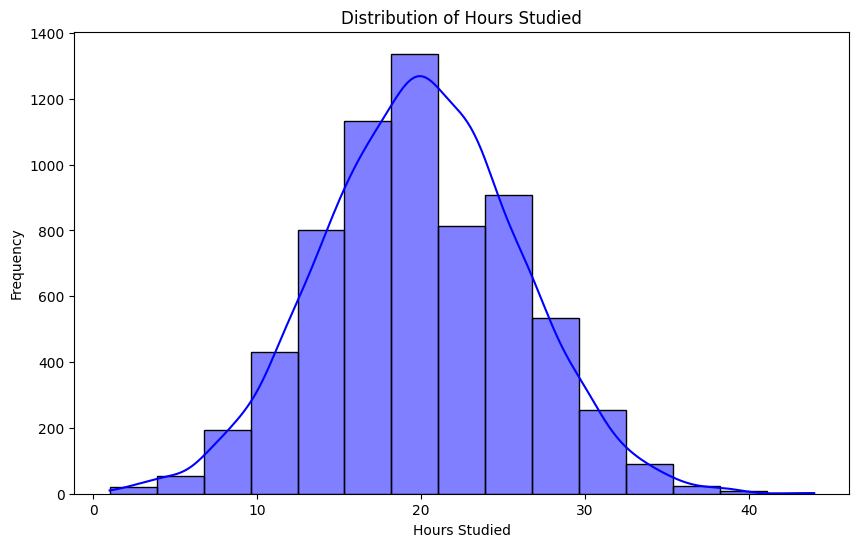

In [29]:
# Histogram of Hours Studied
plt.figure(figsize=(10, 6))
sns.histplot(df['Hours_Studied'], kde=True, bins=15, color='blue')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()


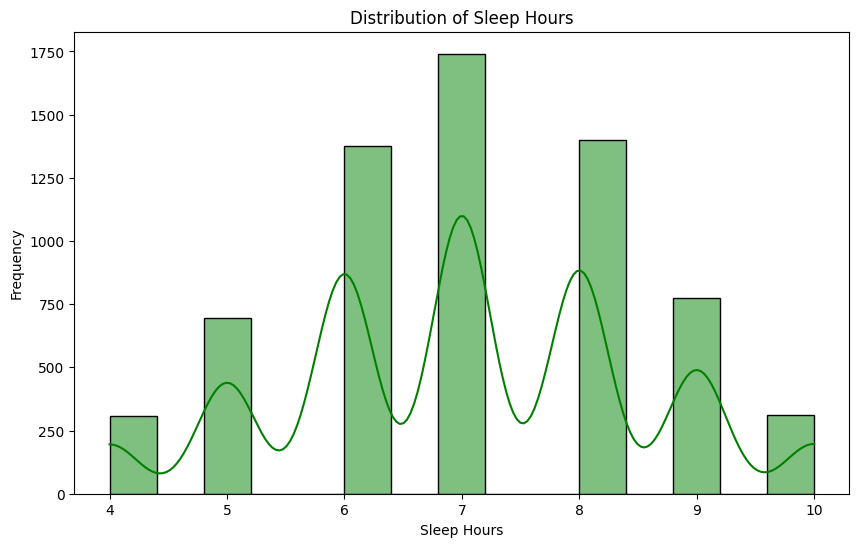

In [30]:
# Histogram of Sleep Hours
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep_Hours'], kde=True, bins=15, color='green')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()


#### Insights
Hours Studied and Sleep Distribution: These visualizations show patterns in how students distribute their study time and sleep, which can be crucial for understanding their academic behavior.

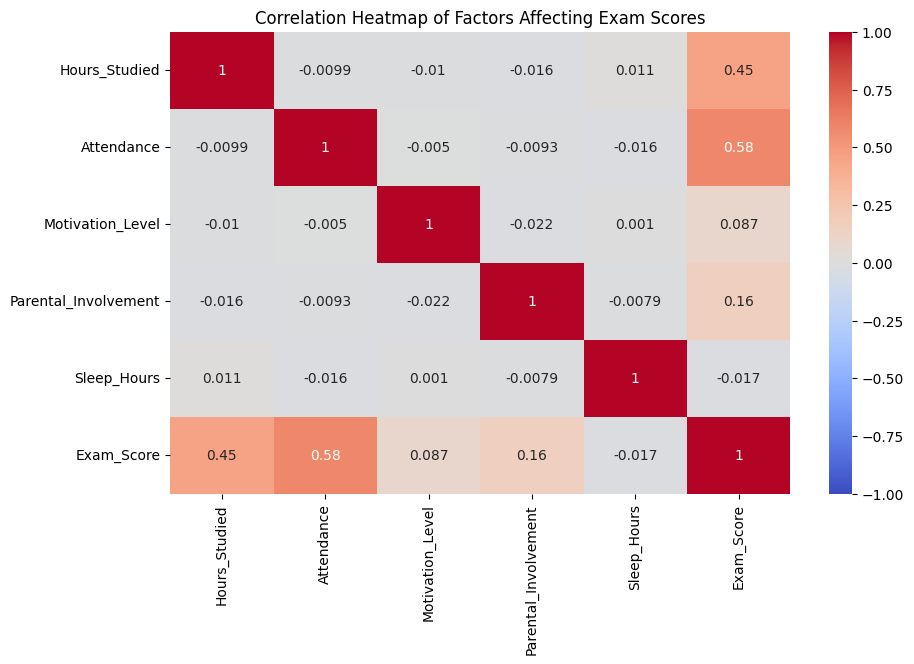

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping categorical columns to numeric values
mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Applying the mapping to relevant columns
df['Motivation_Level'] = df['Motivation_Level'].map(mapping)
df['Parental_Involvement'] = df['Parental_Involvement'].map(mapping)

# Ensure other columns like Attendance are numeric (if not already)
df['Attendance'] = pd.to_numeric(df['Attendance'], errors='coerce')
df['Sleep_Hours'] = pd.to_numeric(df['Sleep_Hours'], errors='coerce')

# Calculate correlations between numerical columns
corr_matrix = df[['Hours_Studied', 'Attendance', 'Motivation_Level', 'Parental_Involvement', 'Sleep_Hours', 'Exam_Score']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Factors Affecting Exam Scores')
plt.show()


#### Insights
Hours Studied is strongly correlated with Exam Score. This suggests that students who spend more time studying generally perform better on exams. <br>
Motivation Level also shows a positive correlation with Exam Score, indicating that motivated students tend to score higher, though not as strongly as hours studied.<br>
Sleep Hours shows a weak negative correlation with exam performance, meaning there might be a slight trend where students who sleep less perform better, but the relationship isn’t very strong. <br>
Parental Involvement has little to no correlation with Exam Score, suggesting that parental involvement may not directly impact exam results, or that the relationship is weak.

### Conclusion:

In this project, I conducted an in-depth analysis and visualization of the factors affecting student academic performance, focusing on key variables such as **academic performance**, **lifestyle factors**, and **demographic details**. By utilizing **MySQL** for data extraction and performing advanced exploratory data analysis (EDA) with **Pandas** and **Matplotlib**, I uncovered several insights:

1. **Impact of Study Habits on Exam Performance**:
   - The analysis showed a clear **positive correlation** between `Hours_Studied` and `Exam_Score`, indicating that students who dedicate more time to studying generally achieve better results. This emphasizes the importance of consistent study habits in academic success.

2. **Motivation and Academic Performance**:
   - Students with higher **Motivation Levels** tend to perform better in exams. This finding suggests that personal drive and commitment play a crucial role in academic achievements, further highlighting the importance of motivational support for students.

3. **Influence of Parental Involvement**:
   - While **Parental Involvement** showed a moderate effect on exam scores, the analysis suggests that strong parental engagement can positively impact student outcomes, but may not be the sole determining factor. Other variables, such as study habits and motivation, play a more direct role.


### Overall Summary:
The analysis provided valuable insights into the relationship between academic performance and various influencing factors. **Study habits and motivation** were found to be the most critical predictors of exam success. While other factors such as parental involvement, gender, and lifestyle play roles, their direct impact on academic scores was less significant compared to hours studied and intrinsic motivation. These findings can help educators, parents, and policymakers focus their efforts on promoting effective study habits and motivational strategies to improve student outcomes.